## Bài tập 2. Lập trình đệ quy và khử đệ quy.
Viết chương trình đệ quy, khử đệ quy, đưa ra đánh giá và so sánh giữa đệ quy và khử đệ quy (khuyến khích sử dụng biểu đồ) sự tăng trưởng của thời gian thực hiện chương trình theo kích thước dữ liệu vào cho bài toán sau:

In [20]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

## 2. Phân tích số nguyên thành tích các thừa số nguyên tố.

In [4]:
def recursive_factorization(n, divisor=2, factors=None):
    if factors is None:
        factors = []
    if n < 2:
        return factors
    if n % divisor == 0:
        factors.append(divisor)
        return recursive_factorization(n // divisor, divisor, factors)
    else:
        return recursive_factorization(n, divisor + 1, factors)


def iterative_factorization(n):
    factors = []
    divisor = 2
    while n >= 2:
        if n % divisor == 0:
            factors.append(divisor)
            n //= divisor
        else:
            divisor += 1
    return factors

In [18]:
def measure_time(func, *args):
    time = %timeit -o -q func(*args)
    return time.best

In [12]:
values = [10, 100, 1000, 10000, 100000, 1000000]
recursive_times = []
iterative_times = []

for val in values:
    recursive_times.append(measure_time(recursive_factorization, val))
    iterative_times.append(measure_time(iterative_factorization, val))

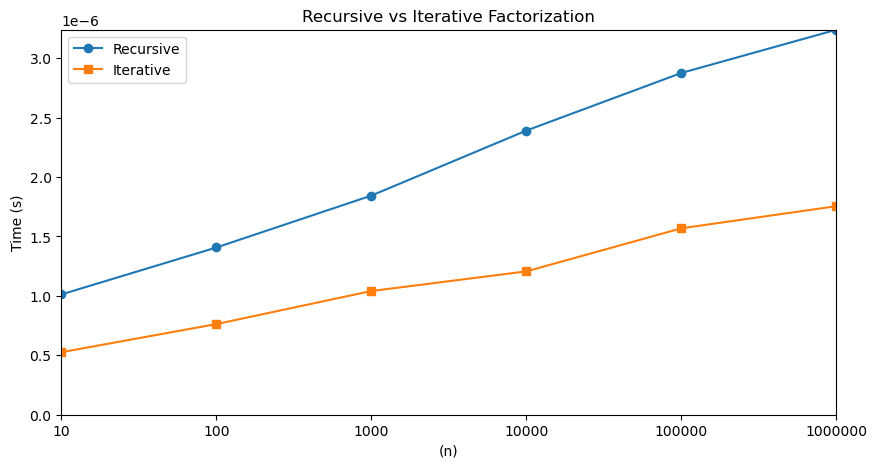

In [15]:
plt.figure(figsize=(10, 5))
x_ticks = np.arange(len(values))
plt.plot(x_ticks, recursive_times, marker='o', label='Recursive')
plt.plot(x_ticks, iterative_times, marker='s', label='Iterative')
plt.xticks(x_ticks, values)
plt.xlabel('(n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Recursive vs Iterative Factorization')
plt.axis([0, len(values) - 1, 0, max(max(recursive_times), max(iterative_times))])
plt.show()

## 3. Tìm số Fibonacci thứ n.

In [9]:
def recursive_fibonacci(n):
    if n <= 1:
        return n
    return recursive_fibonacci(n - 1) + recursive_fibonacci(n - 2)

def iterative_fibonacci(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

In [22]:
def measure_time(func, n):
    start = time.time()
    func(n)
    return time.time() - start

In [23]:
values = [10, 20, 30, 35, 40, 45]
recursive_times = []
iterative_times = []

for val in values:
    recursive_times.append(measure_time(recursive_fibonacci, val))
    iterative_times.append(measure_time(iterative_fibonacci, val))


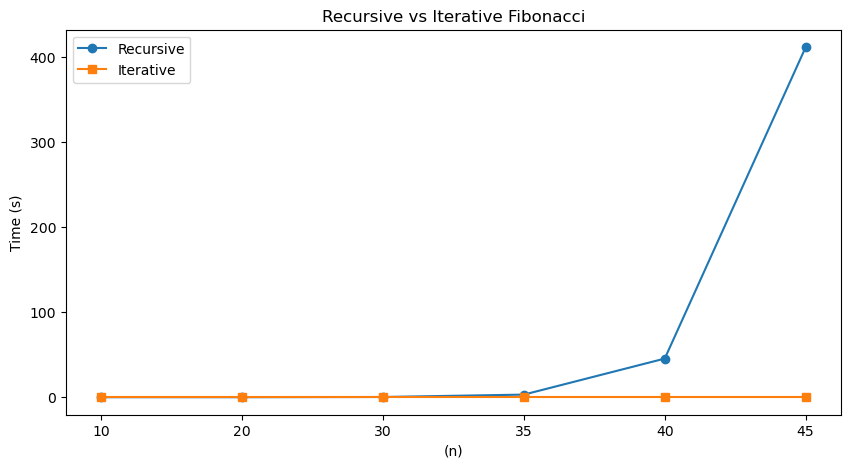

In [25]:
plt.figure(figsize=(10, 5))
x_ticks = np.arange(len(values))
plt.plot(x_ticks, recursive_times, marker='o', label='Recursive')
plt.plot(x_ticks, iterative_times, marker='s', label='Iterative')
plt.xticks(x_ticks, values)
plt.xlabel('(n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Recursive vs Iterative Fibonacci')
plt.show()


## 1. In Biểu diễn nhị phân của số nguyên.

In [29]:
def recursive_binary(n):
    if n == 0:
        return "0"
    if n == 1:
        return "1"
    return recursive_binary(n // 2) + str(n % 2)

def iterative_binary(n):
    if n == 0:
        return "0"
    binary = ""
    while n > 0:
        binary = str(n % 2) + binary
        n //= 2
    return binary

In [30]:
def measure_time(func, *args):
    time = %timeit -o -q func(*args)
    return time.best

In [31]:
values = [10**i for i in range(1, 6)]
recursive_times = []
iterative_times = []

for val in values:
    recursive_times.append(measure_time(recursive_binary, val))
    iterative_times.append(measure_time(iterative_binary, val))

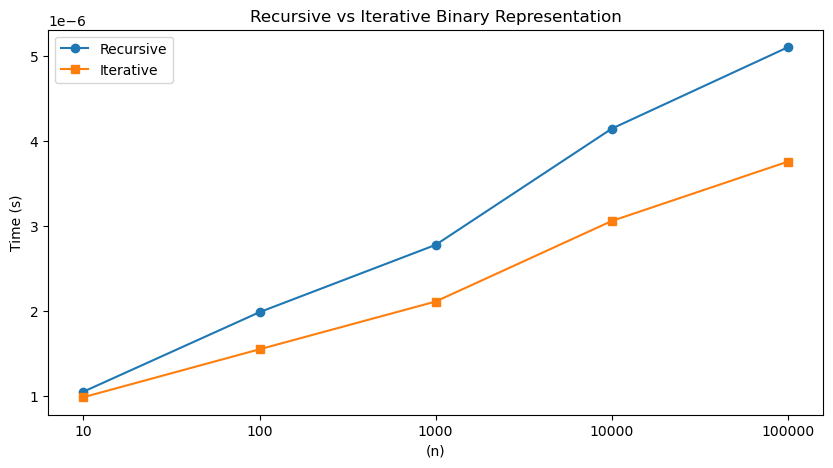

In [32]:
plt.figure(figsize=(10, 5))
x_ticks = np.arange(len(values))
plt.plot(x_ticks, recursive_times, marker='o', label='Recursive')
plt.plot(x_ticks, iterative_times, marker='s', label='Iterative')
plt.xticks(x_ticks, values)
plt.xlabel('(n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Recursive vs Iterative Binary Representation')
plt.show()

## 4. Bài toán Tháp Hà Nội.

In [37]:
def hanoi_iterative(n):
    stack = [(n, 'A', 'C', 'B')]
    steps = []
    while stack:
        num, src, tgt, aux = stack.pop()
        if num == 1:
            steps.append((src, tgt))
        else:
            stack.append((num - 1, aux, tgt, src))
            stack.append((1, src, tgt, aux))
            stack.append((num - 1, src, aux, tgt))
    return steps

def hanoi_recursive(n, source, target, auxiliary):
    if n == 1:
        return [(source, target)]
    steps = hanoi_recursive(n - 1, source, auxiliary, target)
    steps.append((source, target))
    steps += hanoi_recursive(n - 1, auxiliary, target, source)
    return steps

In [38]:
def measure_time(func, n):
    time = %timeit -o -q func(n)
    return time.best

In [39]:
num_disks = [5, 10, 15, 20]
recursive_times = []
iterative_times = []

for n in num_disks:
    recursive_times.append(measure_time(lambda x: hanoi_recursive(x, 'A', 'C', 'B'), n))
    iterative_times.append(measure_time(hanoi_iterative, n))

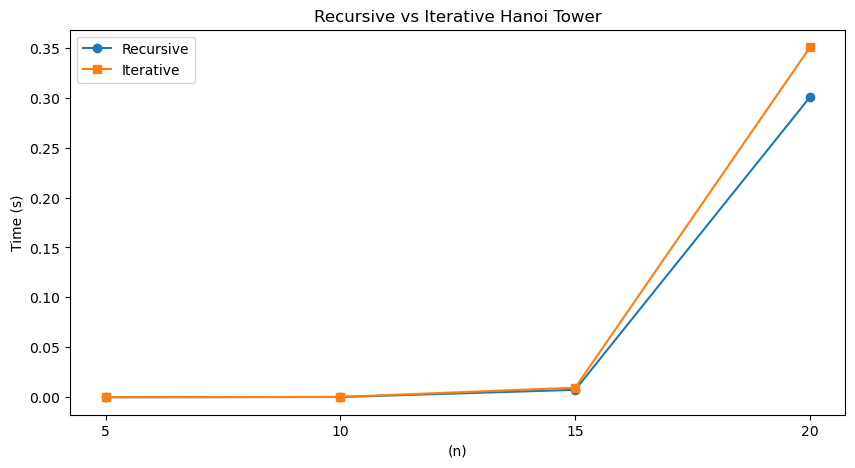

In [40]:
plt.figure(figsize=(10, 5))
x_ticks = np.arange(len(num_disks))
plt.plot(x_ticks, recursive_times, marker='o', label='Recursive')
plt.plot(x_ticks, iterative_times, marker='s', label='Iterative')
plt.xticks(x_ticks, num_disks)
plt.xlabel('(n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Recursive vs Iterative Hanoi Tower')
plt.show()
